# Blackjack

### Random Action Player

## DQN Agent

In [23]:
import random
import gym
import numpy as np
from tqdm import tqdm
import tensorflow as tf
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop
import keras.layers as layers
import matplotlib.pyplot as plt

In [9]:
class QMemoryUnit():
    def __init__(self, state, action, reward, done, next_state):
        self.state = state
        self.action = action
        self.reward = reward
        self.done = done
        self.next_state = next_state

In [35]:
memory_size = 10000
episodes = 100000
epsilon = 0.1
gamma = 0.2
minibatch_size = 32

tf.set_random_seed(0)
np.random.seed(0)
model = Sequential()
model.add(Dense(10, input_dim=4, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer=RMSprop())

memory = deque(maxlen=memory_size)
env = gym.make('Blackjack-v0')
test_env = gym.make('Blackjack-v0')

#valid actions
action_space = np.array([0,1])

#state + actions
action_state = np.zeros((2,4))

steps = 0
reward_plot = []
loss_plot = []
rewards = []
for episode in tqdm(range(episodes)):
    done = False
    state = np.array(env.reset())
    total_reward = 0
    while(not done):
        action_state[:,:3] = state
        action_state[:,3] = action_space
        
        #random choice
        if(random.random() < epsilon):
            action = np.random.choice(action_space)
        
        #action with greatest expected value
        else:
            action = np.argmax(model.predict(action_state))
            
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
        
        memory.append(QMemoryUnit(state, action, reward, done, next_state))
        state = next_state
        
        minibatch = np.zeros((minibatch_size, 4))
        labels = np.zeros(minibatch_size)
        #generate minibatch and labels
        for i in range(minibatch_size):
            index = np.random.randint(0, len(memory))
            sample = memory[index]
            
            reward = sample.reward
            if(not sample.done):
                action_state[:,:3] = sample.next_state
                action_state[:,3] = action_space
                reward += gamma * np.max(model.predict(action_state))
            
            minibatch[i,:3] = sample.state
            minibatch[i,3] = sample.action
            labels[i] = reward
            
        history = model.fit(minibatch, labels, verbose=0)
        loss_plot.append(history.history['loss'])
        if(steps%50 == 0):
            total_reward = 0
            for i in range(1000):
                test_env.seed(i)
                state = test_env.reset()
                done = False
                while(not done):
                    action_state[:,:3] = state
                    action = np.argmax(model.predict(action_state))
                    state, reward, done, _ = test_env.step(action)
                total_reward += reward
            reward_plot.append(total_reward)
            
            
        steps+=1
        
    rewards.append(total_reward)


  0%|          | 0/100000 [00:00<?, ?it/s]
Exception in thread Thread-8:
Traceback (most recent call last):
  File "/anaconda/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/anaconda/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/anaconda/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

100%|██████████| 100000/100000 [2:37:35<00:00, 10.58it/s] 


In [36]:
total_reward = 0
for i in range(1000):
    env.seed(i)
    state = env.reset()
    done = False
    while(not done):
        action_state[:,:3] = state
        action = np.argmax(model.predict(action_state))
        state, reward, done, _ = env.step(action)
    total_reward += reward

In [37]:
total_reward

-14.0

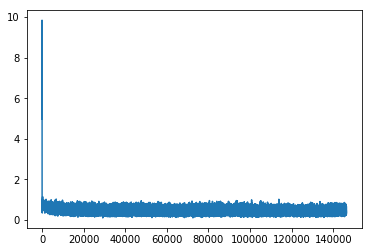

In [38]:
plt.plot(loss_plot)
plt.show()

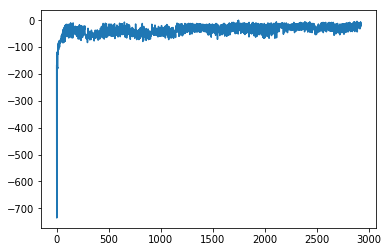

In [39]:
plt.plot(reward_plot)
plt.show()

In [40]:
reward_plot

[-169.0,
 -736.0,
 -161.0,
 -119.0,
 -119.0,
 -123.0,
 -183.0,
 -175.0,
 -175.0,
 -178.0,
 -179.0,
 -109.0,
 -127.0,
 -127.0,
 -89.0,
 -109.0,
 -89.0,
 -84.0,
 -86.0,
 -109.0,
 -79.0,
 -85.0,
 -86.0,
 -79.0,
 -77.0,
 -99.0,
 -99.0,
 -99.0,
 -99.0,
 -99.0,
 -79.0,
 -78.0,
 -86.0,
 -84.0,
 -75.0,
 -76.0,
 -73.0,
 -81.0,
 -75.0,
 -80.0,
 -82.0,
 -74.0,
 -78.0,
 -68.0,
 -79.0,
 -60.0,
 -57.0,
 -74.0,
 -71.0,
 -65.0,
 -70.0,
 -66.0,
 -66.0,
 -51.0,
 -68.0,
 -67.0,
 -63.0,
 -45.0,
 -44.0,
 -84.0,
 -47.0,
 -41.0,
 -66.0,
 -34.0,
 -51.0,
 -83.0,
 -41.0,
 -59.0,
 -53.0,
 -82.0,
 -34.0,
 -52.0,
 -49.0,
 -26.0,
 -38.0,
 -59.0,
 -54.0,
 -32.0,
 -35.0,
 -78.0,
 -35.0,
 -78.0,
 -19.0,
 -27.0,
 -33.0,
 -19.0,
 -33.0,
 -36.0,
 -34.0,
 -34.0,
 -24.0,
 -31.0,
 -39.0,
 -15.0,
 -25.0,
 -29.0,
 -27.0,
 -53.0,
 -53.0,
 -20.0,
 -61.0,
 -43.0,
 -39.0,
 -52.0,
 -27.0,
 -21.0,
 -29.0,
 -26.0,
 -26.0,
 -29.0,
 -15.0,
 -25.0,
 -17.0,
 -35.0,
 -49.0,
 -27.0,
 -66.0,
 -25.0,
 -37.0,
 -35.0,
 -32.0,
 -25.0,
 -23.0,
